Collecting data from Yahoo Finance using yfinance library.

In [2]:
import yfinance as yf

tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "^GSPC"]
start_date = "2020-01-01"
end_date = "2024-12-31"

data = {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in tickers}

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data Preprocessing

In [3]:
import pandas as pd
from ta.momentum import RSIIndicator
from sklearn.preprocessing import MinMaxScaler

def preprocess_stock_data(df):
    df = df.copy()

    # calculate moving average
    df['MA_20'] = df['Close'].rolling(window=20).mean()

    # ensure Close is 1D Series for RSIIndicator
    close_series = df['Close'].squeeze()
    if isinstance(close_series, pd.DataFrame):  # just in case
        close_series = close_series.iloc[:, 0]

    # compute RSI
    rsi = RSIIndicator(close=close_series, window=14, fillna=True).rsi()
    df['RSI'] = rsi

    # remove rows with NaN values
    df.dropna(inplace=True)

    # normalization using MinMaxScaler
    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])
    scaled_df = pd.DataFrame(scaled_values, index=df.index, columns=['Open', 'High', 'Low', 'Close', 'Volume'])

    # include technical indicators
    scaled_df['MA_20'] = df['MA_20'].values
    scaled_df['RSI'] = df['RSI'].values

    return scaled_df

# execute preprocessing in every ticker
preprocessed_data = {}
for ticker in tickers:
    df = data[ticker]
    try:
        preprocessed_data[ticker] = preprocess_stock_data(df)
        print(f"{ticker} preprocessing completed successfully.")
    except Exception as e:
        print(f"{ticker} error during preprocessing: {e}")

AAPL preprocessing completed successfully.
MSFT preprocessing completed successfully.
GOOGL preprocessing completed successfully.
AMZN preprocessing completed successfully.
TSLA preprocessing completed successfully.
^GSPC preprocessing completed successfully.


EDA


 EDA for AAPL


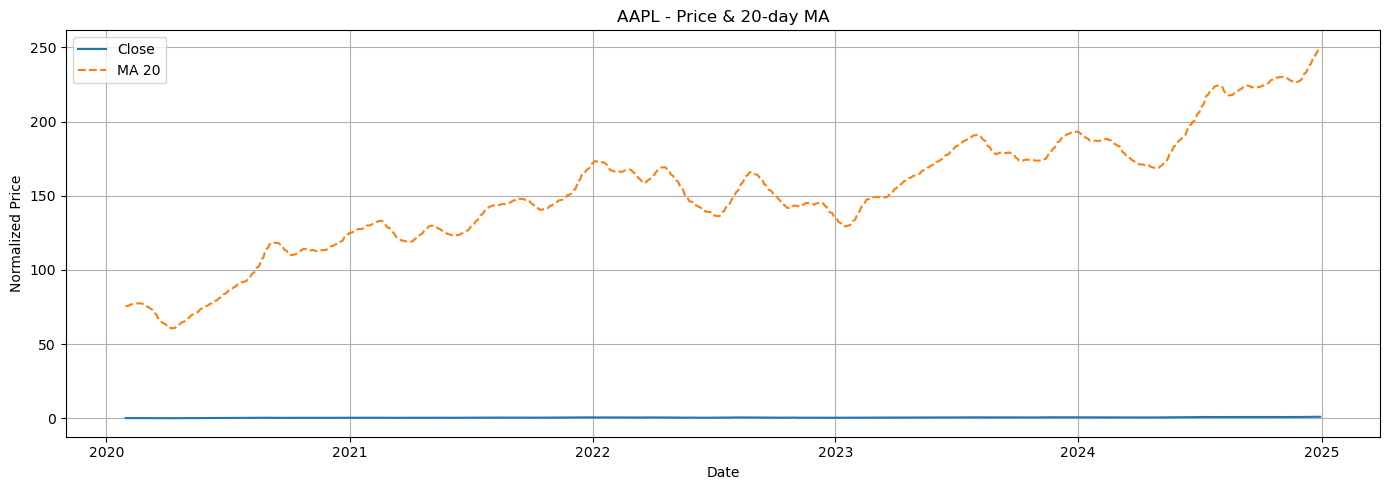

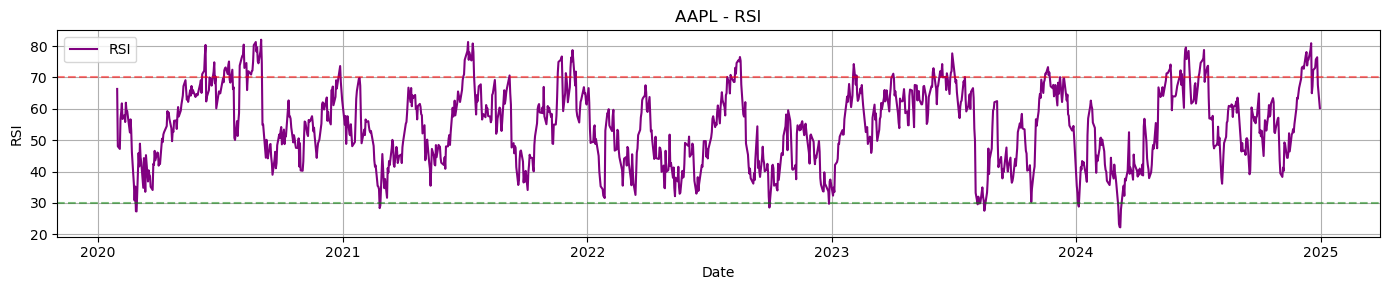

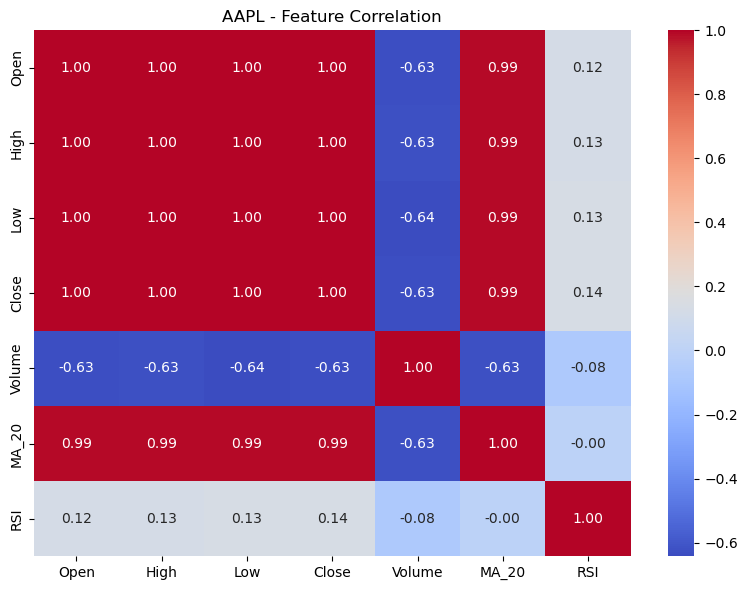

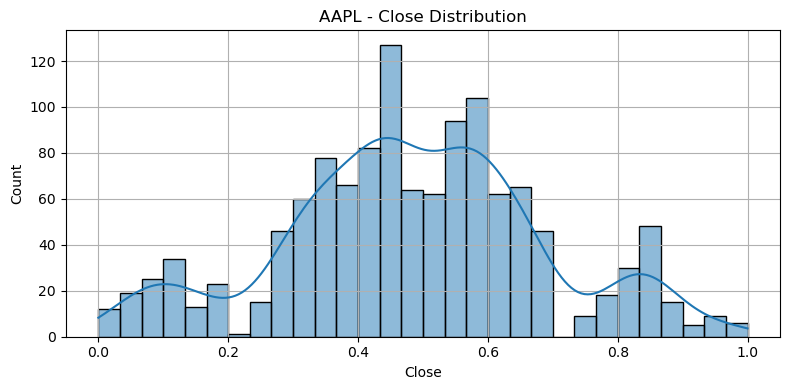


 EDA for MSFT


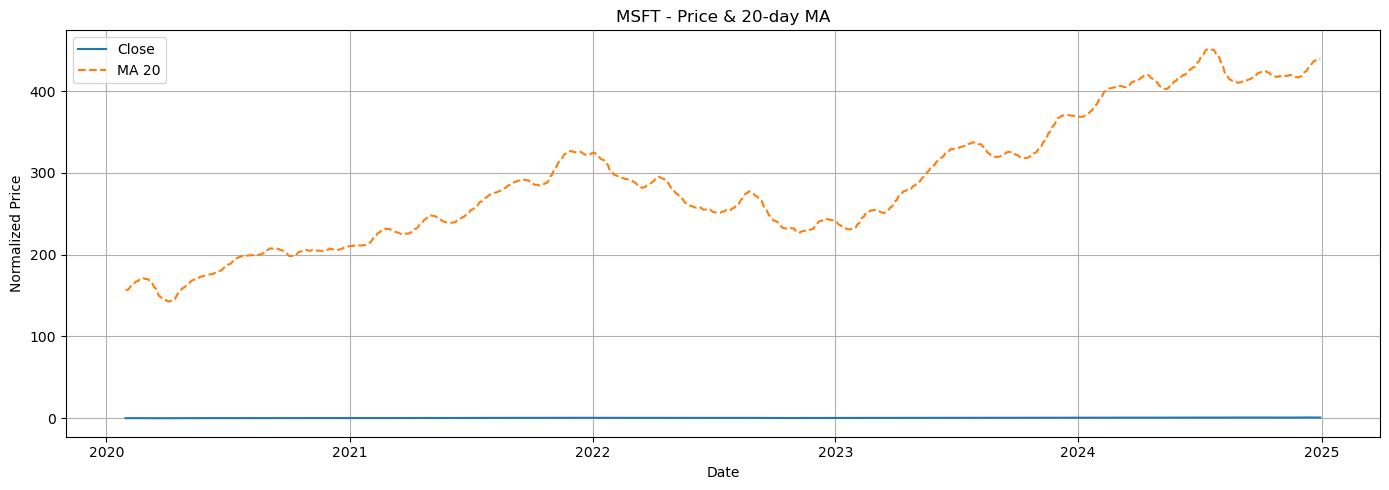

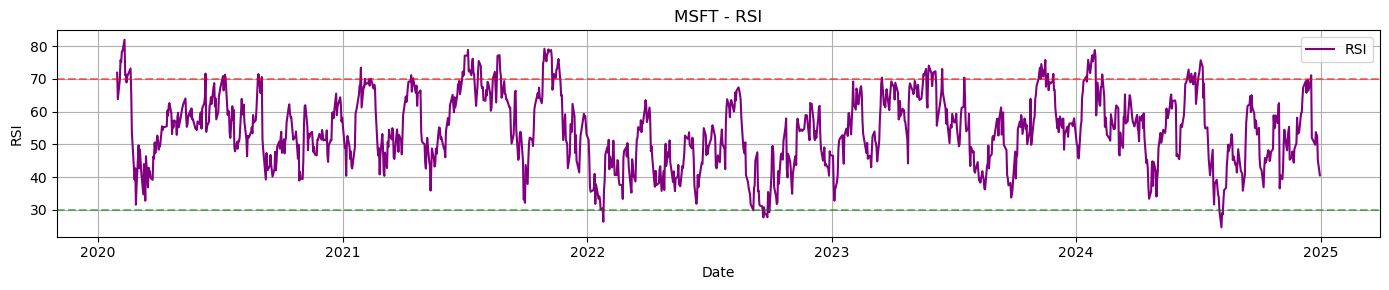

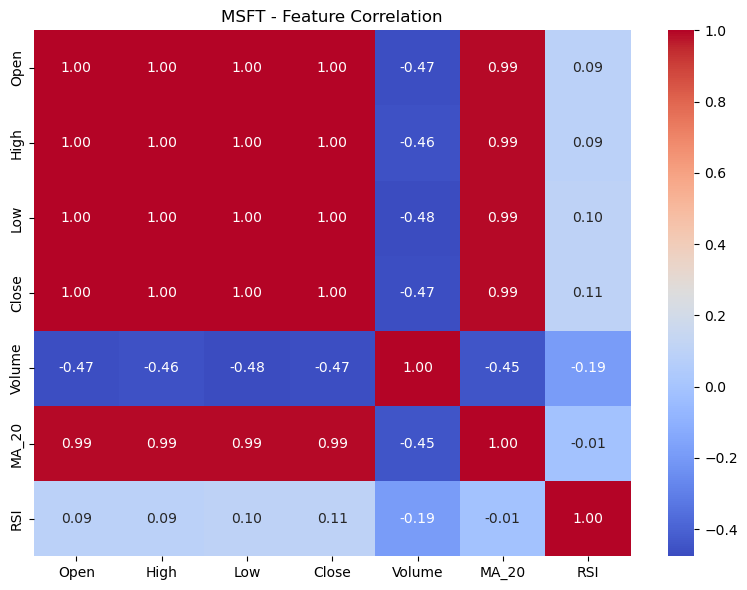

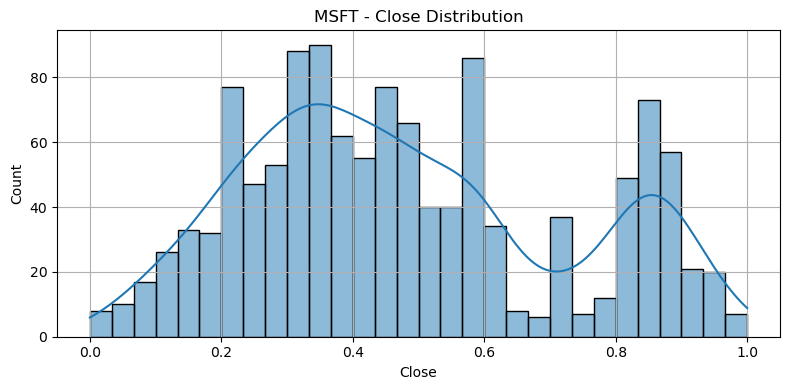


 EDA for GOOGL


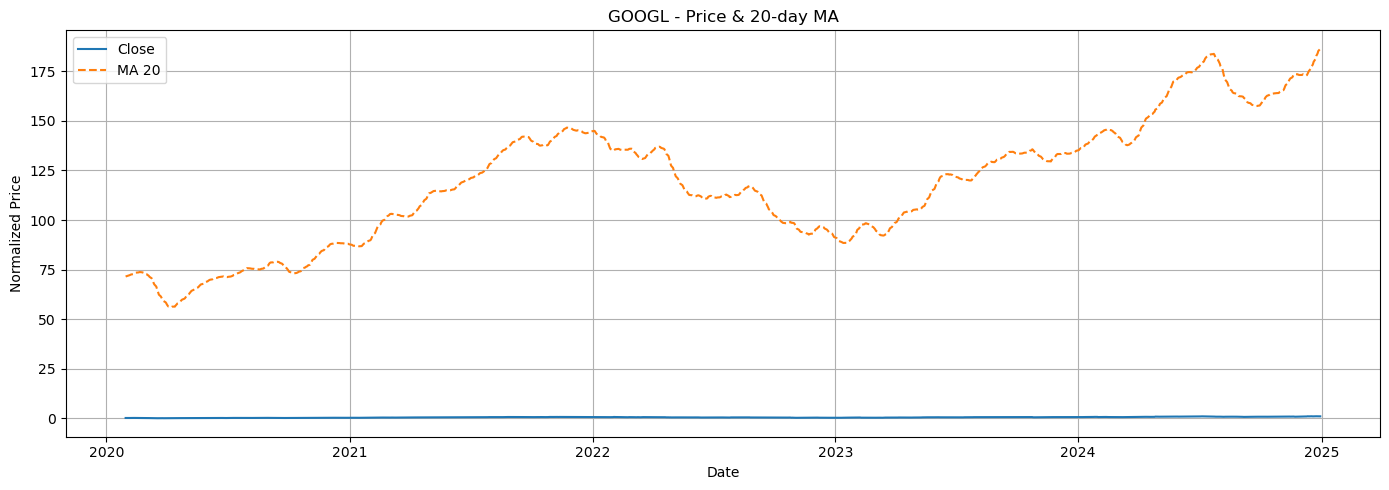

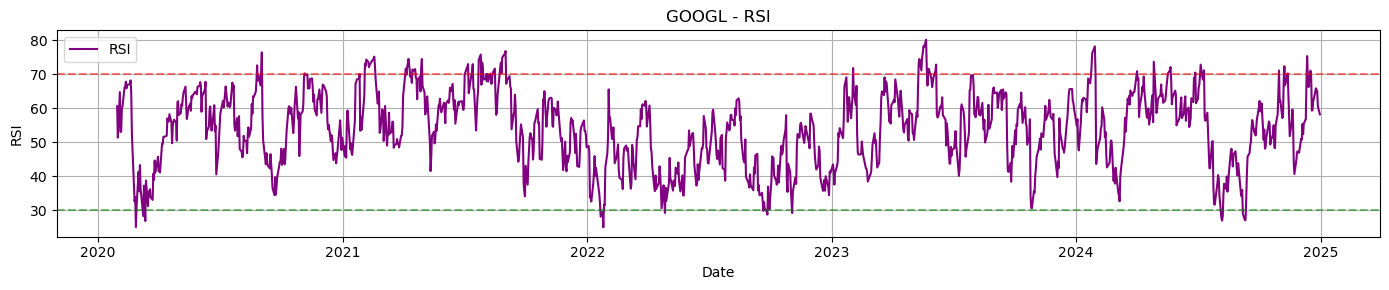

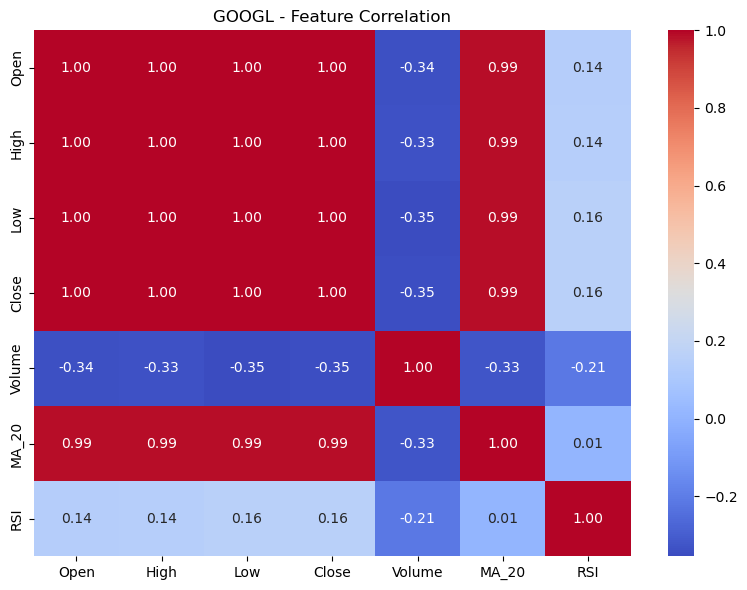

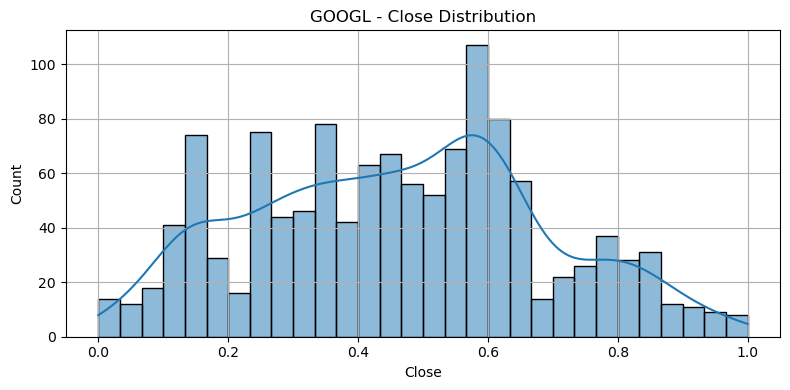


 EDA for AMZN


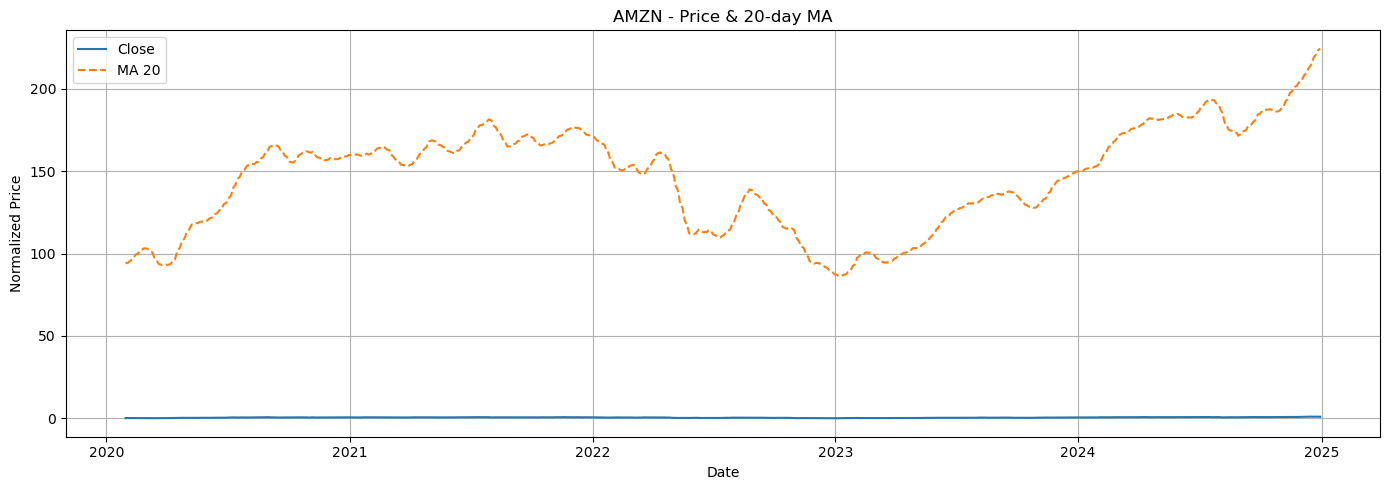

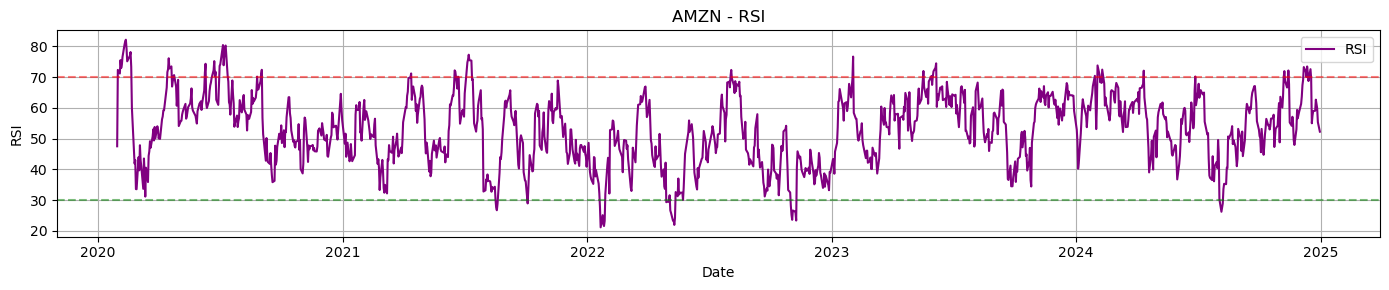

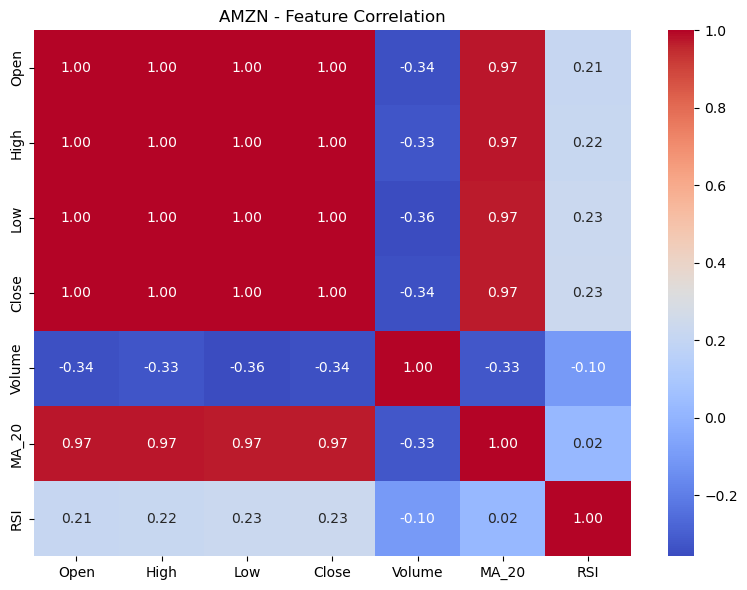

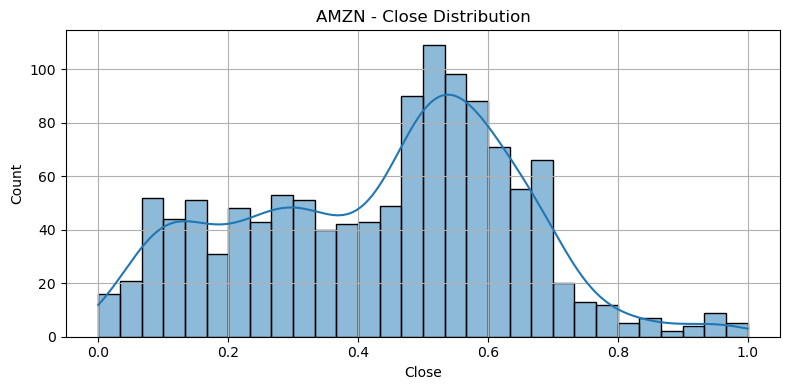


 EDA for TSLA


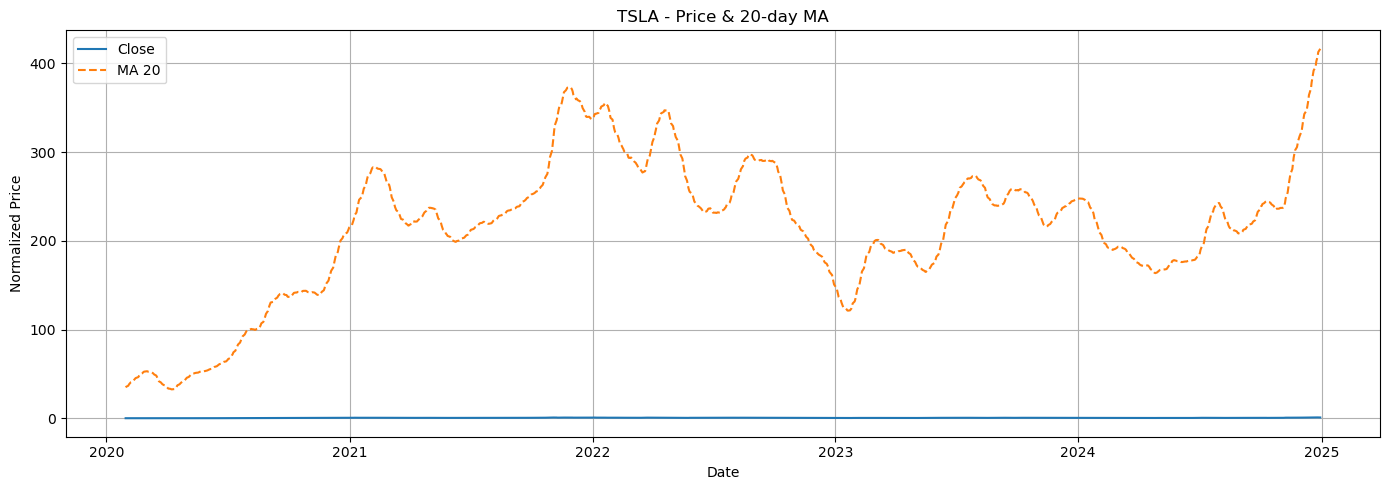

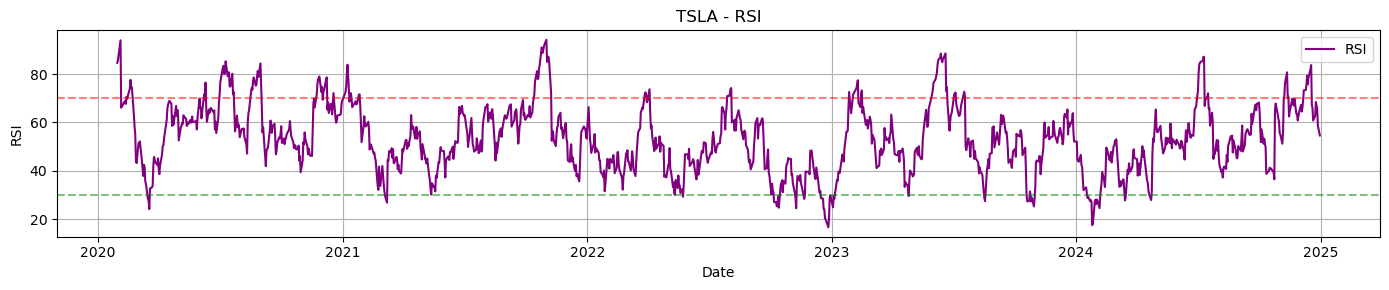

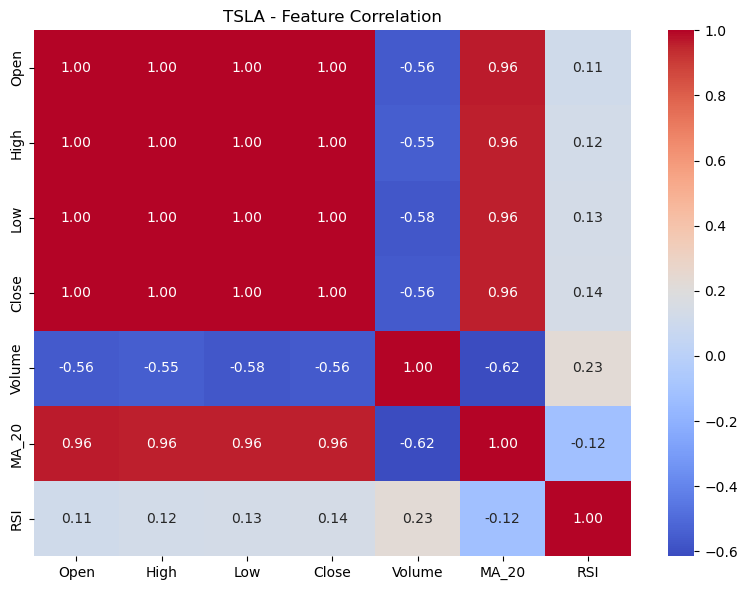

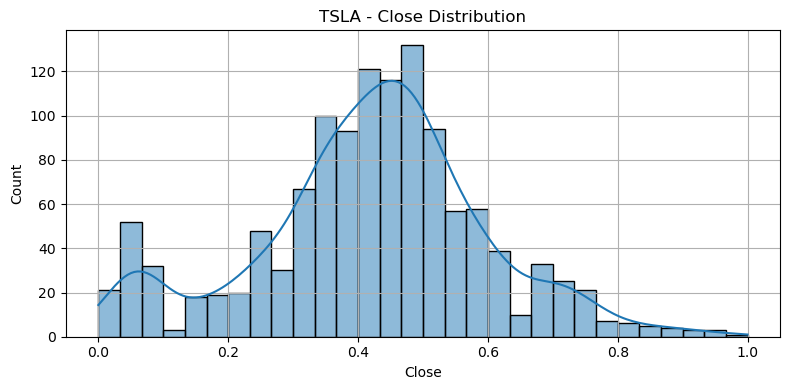


 EDA for ^GSPC


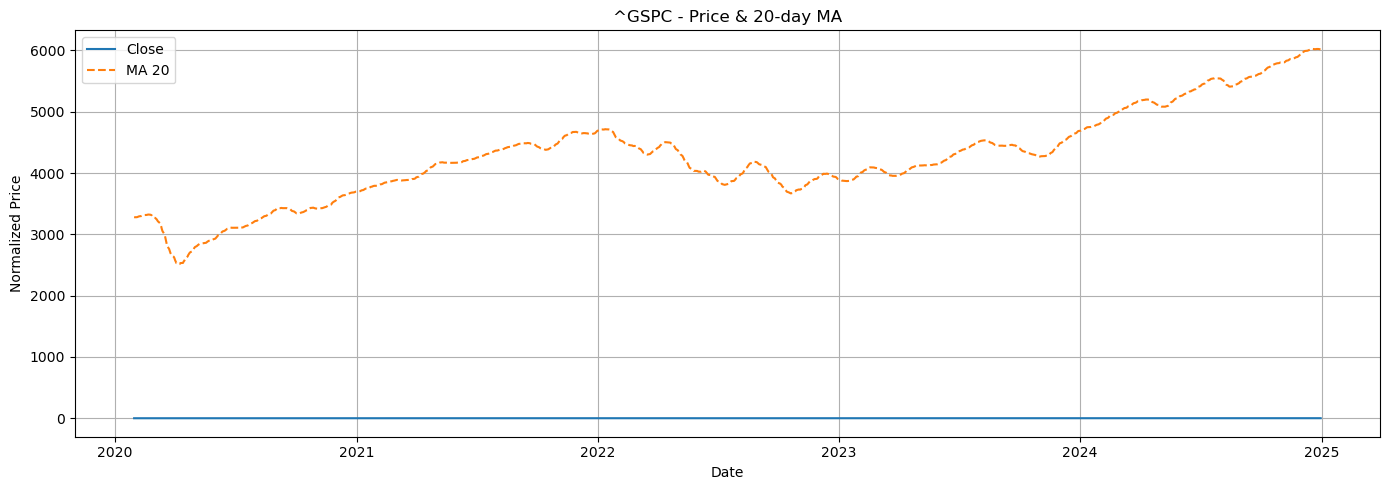

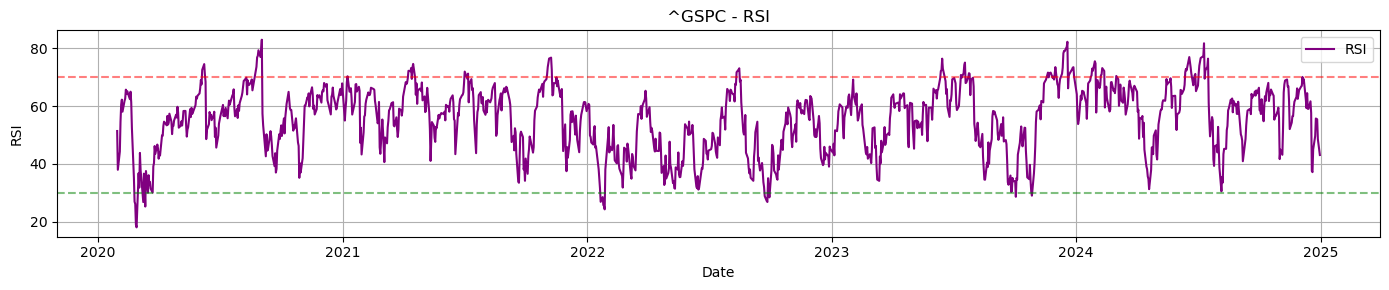

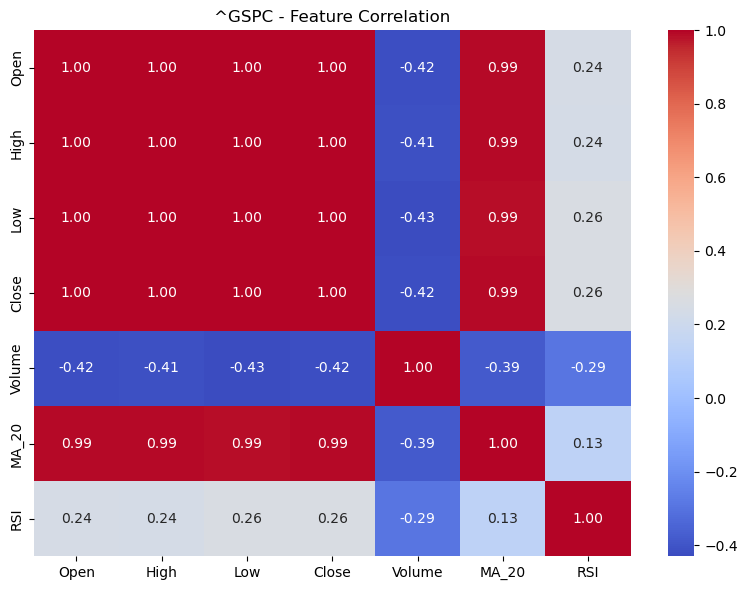

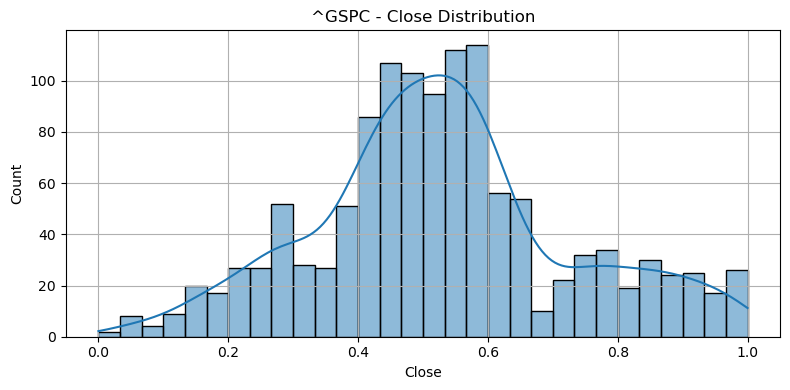

In [4]:
# Jupyter Notebook -- set graph output
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# visualize price tendency and average movement
def plot_price_trend(ticker, df):
    plt.figure(figsize=(14, 5))
    plt.plot(df['Close'], label='Close')
    plt.plot(df['MA_20'], label='MA 20', linestyle='--')
    plt.title(f"{ticker} - Price & 20-day MA")
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# visualize RSI
def plot_rsi(ticker, df):
    plt.figure(figsize=(14, 3))
    plt.plot(df['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', alpha=0.5)
    plt.axhline(30, color='green', linestyle='--', alpha=0.5)
    plt.title(f"{ticker} - RSI")
    plt.xlabel("Date")
    plt.ylabel("RSI")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# correlation hitmap
def plot_correlation_heatmap(ticker, df):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"{ticker} - Feature Correlation")
    plt.tight_layout()
    plt.show()

# distribution in increase analysis
def plot_distribution(ticker, df, column='Close'):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"{ticker} - {column} Distribution")
    plt.xlabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ================================
# auto-execute EDA
# ================================
for ticker in tickers:
    print(f"\n EDA for {ticker}")
    try:
        df = preprocessed_data[ticker]
        plot_price_trend(ticker, df)
        plot_rsi(ticker, df)
        plot_correlation_heatmap(ticker, df)
        plot_distribution(ticker, df, column='Close')
    except Exception as e:
        print(f"{ticker} EDA error: {e}")

*** Linear Regression, Decision Tree, SVR, Random Forest Regressor ***
* includes evaluation


🚀 Running models for AAPL
✅ Linear Regression done - RMSE: 0.0050, MAE: 0.0039, R2: 0.9984
✅ Decision Tree done - RMSE: 0.1323, MAE: 0.0972, R2: -0.1184
✅ SVR done - RMSE: 0.1774, MAE: 0.1553, R2: -1.0096
✅ Random Forest done - RMSE: 0.1308, MAE: 0.0952, R2: -0.0928

🚀 Running models for MSFT
✅ Linear Regression done - RMSE: 0.0053, MAE: 0.0041, R2: 0.9896
✅ Decision Tree done - RMSE: 0.1436, MAE: 0.1343, R2: -6.7297
✅ SVR done - RMSE: 0.1804, MAE: 0.1745, R2: -11.1884
✅ Random Forest done - RMSE: 0.1449, MAE: 0.1356, R2: -6.8656

🚀 Running models for GOOGL
✅ Linear Regression done - RMSE: 0.0063, MAE: 0.0049, R2: 0.9964
✅ Decision Tree done - RMSE: 0.1503, MAE: 0.1202, R2: -1.0321
✅ SVR done - RMSE: 0.1908, MAE: 0.1739, R2: -2.2754
✅ Random Forest done - RMSE: 0.1523, MAE: 0.1218, R2: -1.0853

🚀 Running models for AMZN
✅ Linear Regression done - RMSE: 0.0064, MAE: 0.0049, R2: 0.9967
✅ Decision Tree done - RMSE: 0.0996, MAE: 0.0605, R2: 0.2080
✅ SVR done - RMSE: 0.1272, MAE: 0.1102, R

/var/folders/x5/bmgvrsf55cgfcz4wzxg0gyj40000gn/T/ipykernel_26441/3358200816.py:73: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


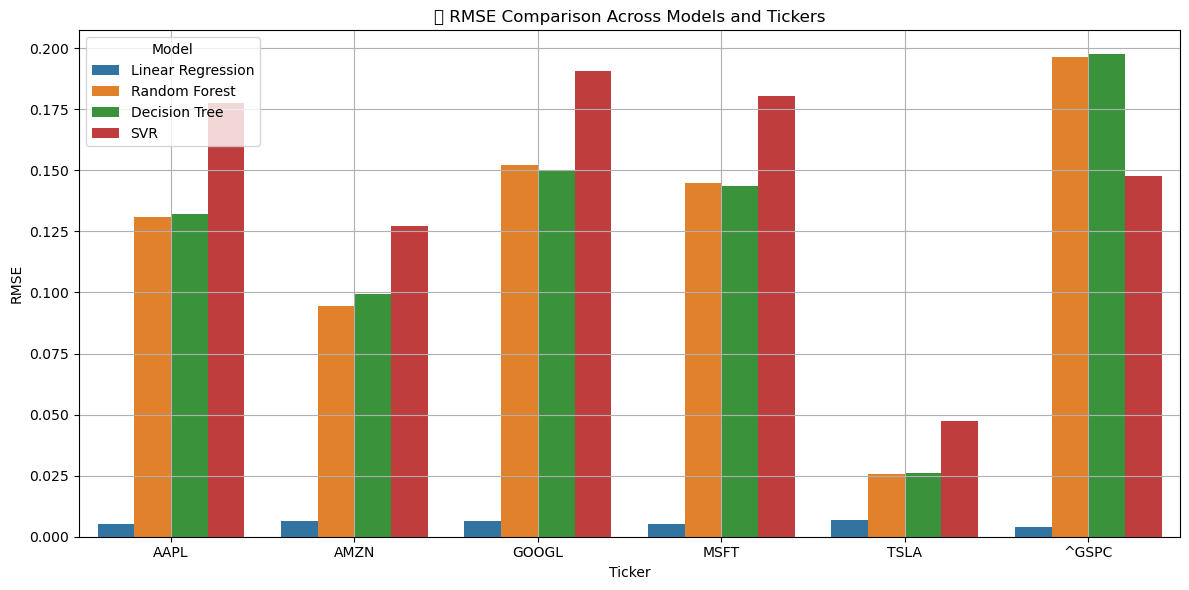

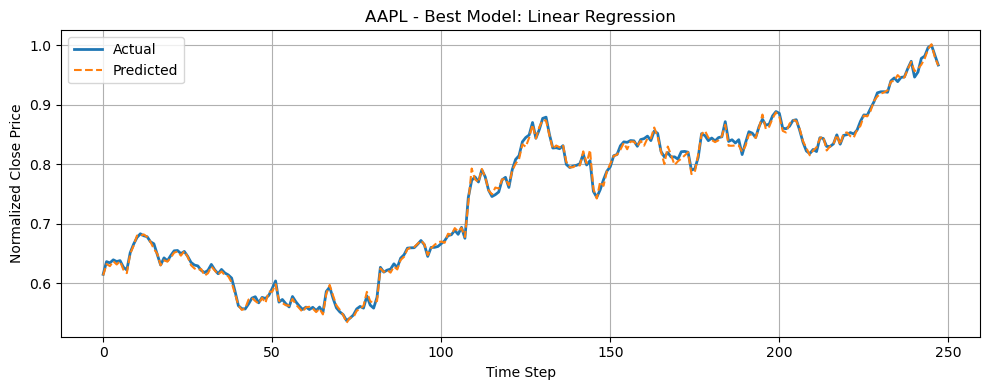

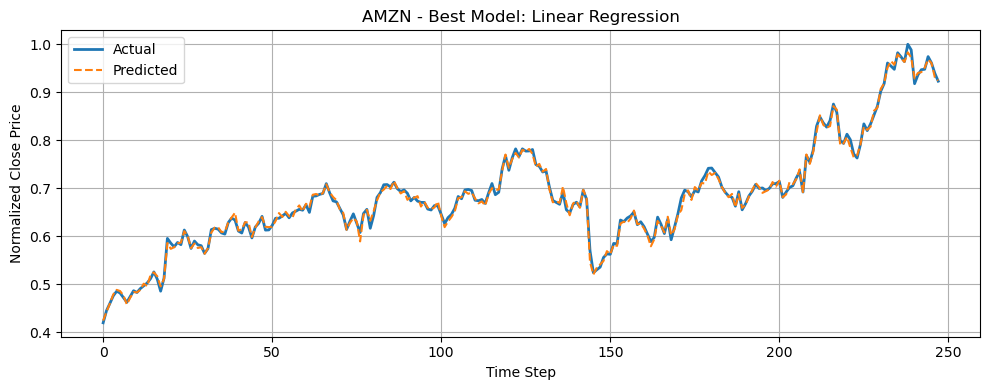

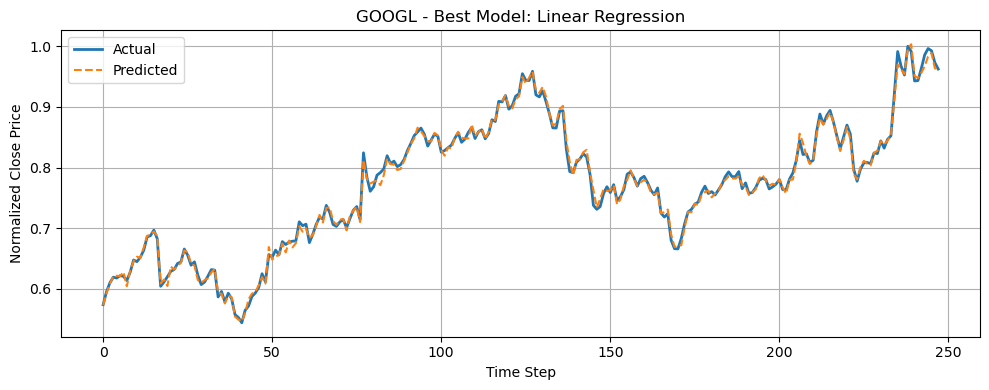

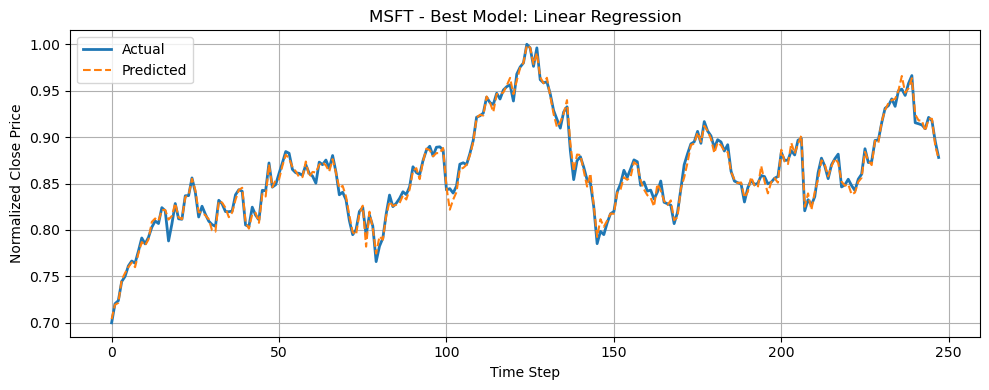

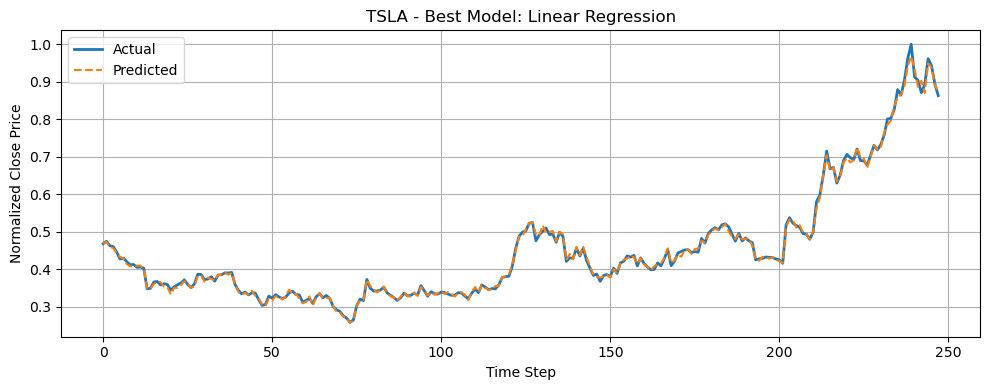

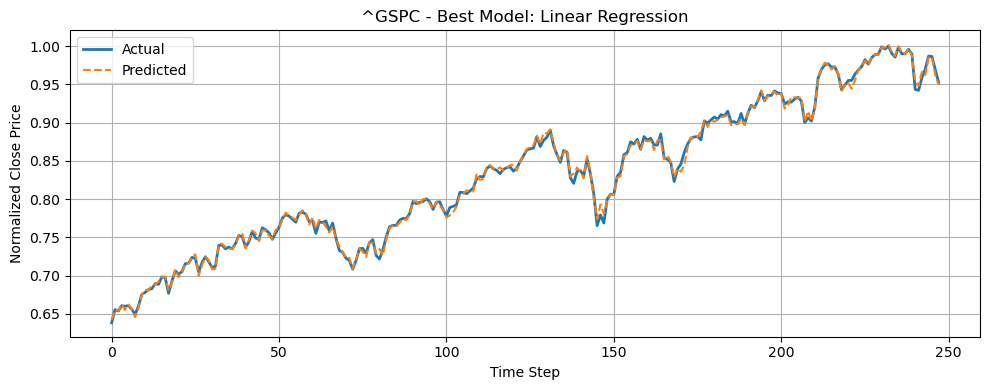

,Ticker,Model,RMSE,MAE,R2
0,AAPL,Linear Regression,0.005027,0.003872,0.998385
1,AMZN,Linear Regression,0.006399,0.004948,0.996728
2,GOOGL,Linear Regression,0.006345,0.004935,0.996379
3,MSFT,Linear Regression,0.005275,0.004075,0.989573
4,TSLA,Linear Regression,0.006681,0.004658,0.998137
5,^GSPC,Linear Regression,0.004116,0.002971,0.998066


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 1. define model
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "SVR": SVR(C=1.0, epsilon=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# 2. for performance and prediction
all_results = []
predictions_dict = {}

# 3. for ticker
for ticker in tickers:
    print(f"\n🚀 Running models for {ticker}")
    try:
        df = preprocessed_data[ticker].copy()

        X = df[['Open', 'High', 'Low', 'Volume', 'MA_20', 'RSI']]
        y = df['Close']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        for name, model in models.items():
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

            rmse = np.sqrt(mean_squared_error(y_test, preds))
            mae = mean_absolute_error(y_test, preds)
            r2 = r2_score(y_test, preds)

            # save result
            all_results.append({
                'Ticker': ticker,
                'Model': name,
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2
            })

            # save prediction
            predictions_dict[(ticker, name)] = (y_test.values, preds)

            print(f"✅ {name} done - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")

# 4️⃣ make result table
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values(by=['Ticker', 'RMSE'])

# 5️⃣ find best model (RMSE basis)
best_models_df = results_df.loc[results_df.groupby("Ticker")["RMSE"].idxmin()].reset_index(drop=True)

# 6️⃣ performance visualization - RMSE bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Ticker', y='RMSE', hue='Model')
plt.title("📊 RMSE Comparison Across Models and Tickers")
plt.ylabel("RMSE")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7️⃣ performance visualization - best model's prediction vs actual
for idx, row in best_models_df.iterrows():
    ticker = row['Ticker']
    model = row['Model']
    y_true, y_pred = predictions_dict.get((ticker, model), (None, None))

    if y_true is not None and y_pred is not None:
        plt.figure(figsize=(10, 4))
        plt.plot(y_true, label='Actual', linewidth=2)
        plt.plot(y_pred, label='Predicted', linestyle='--')
        plt.title(f"{ticker} - Best Model: {model}")
        plt.xlabel("Time Step")
        plt.ylabel("Normalized Close Price")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 8️⃣ print performance table
from IPython.display import display
display(best_models_df)

*** LSTM



📈 LSTM for AAPL


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
✅ LSTM - RMSE: 0.1807, MAE: 0.1597, R2: -1.0675


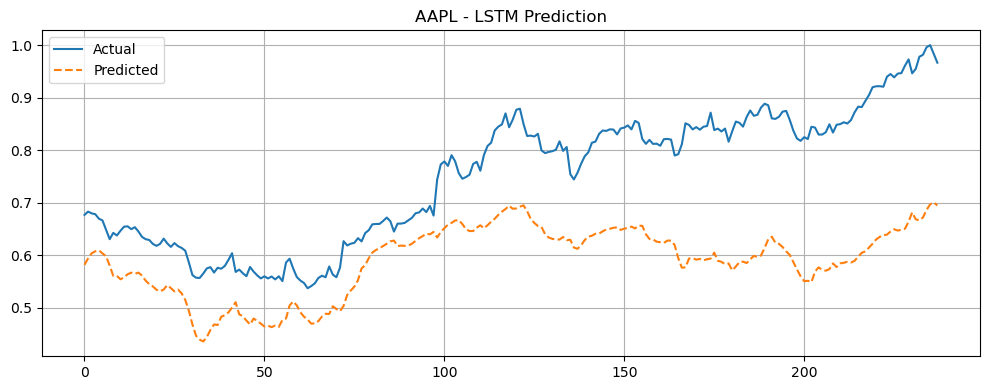


📈 LSTM for MSFT


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
✅ LSTM - RMSE: 0.1930, MAE: 0.1887, R2: -15.8994


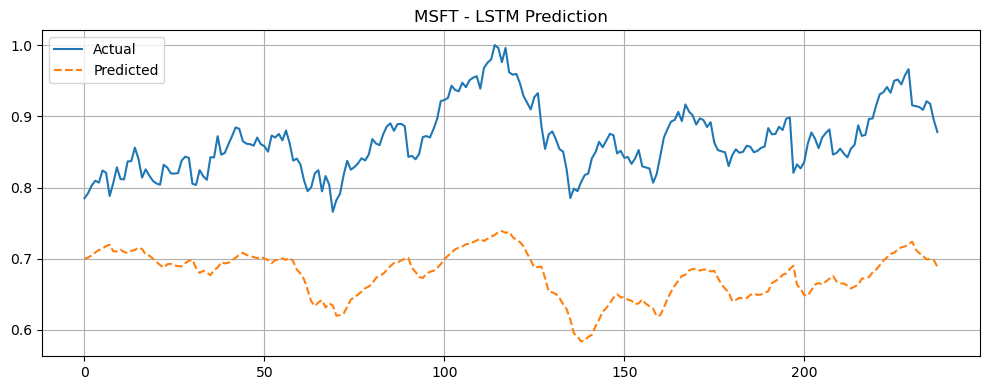


📈 LSTM for GOOGL


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
✅ LSTM - RMSE: 0.0978, MAE: 0.0831, R2: 0.0891


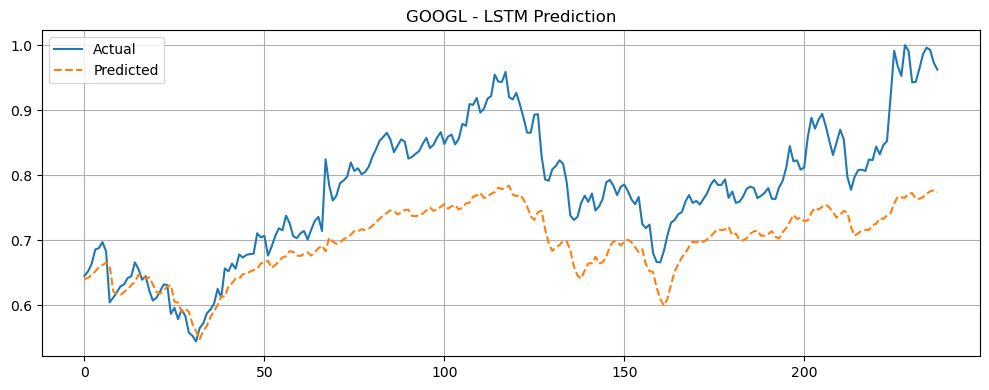


📈 LSTM for AMZN


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
✅ LSTM - RMSE: 0.0726, MAE: 0.0464, R2: 0.5200


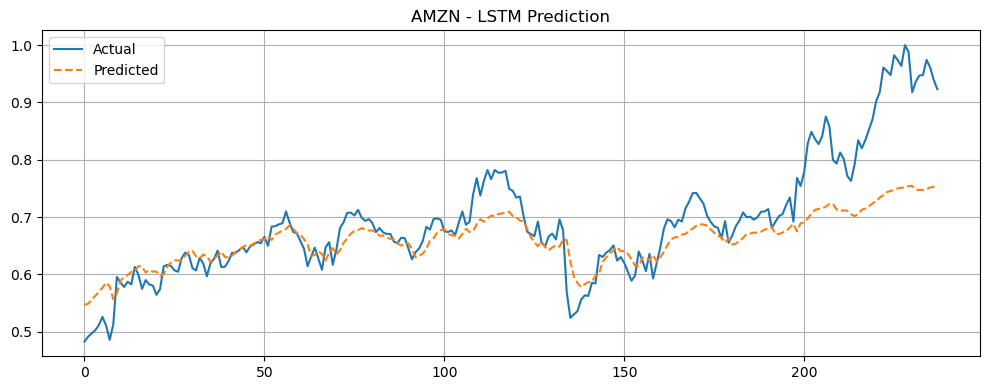


📈 LSTM for TSLA


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
✅ LSTM - RMSE: 0.0629, MAE: 0.0382, R2: 0.8412


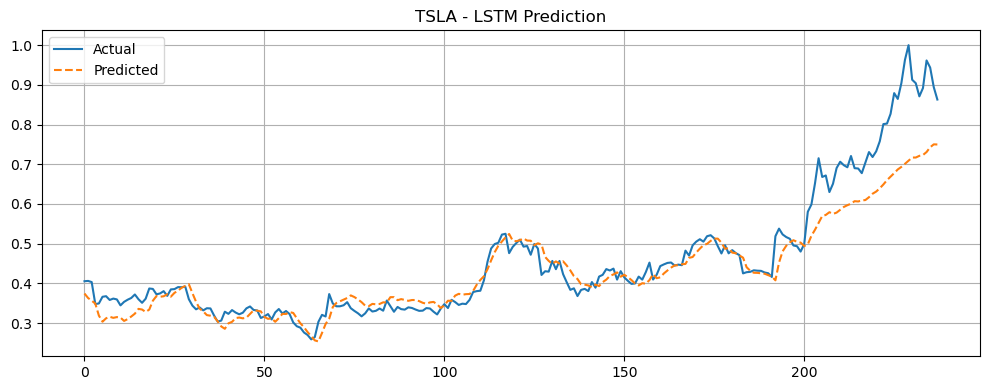


📈 LSTM for ^GSPC


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
✅ LSTM - RMSE: 0.3926, MAE: 0.3825, R2: -18.7187


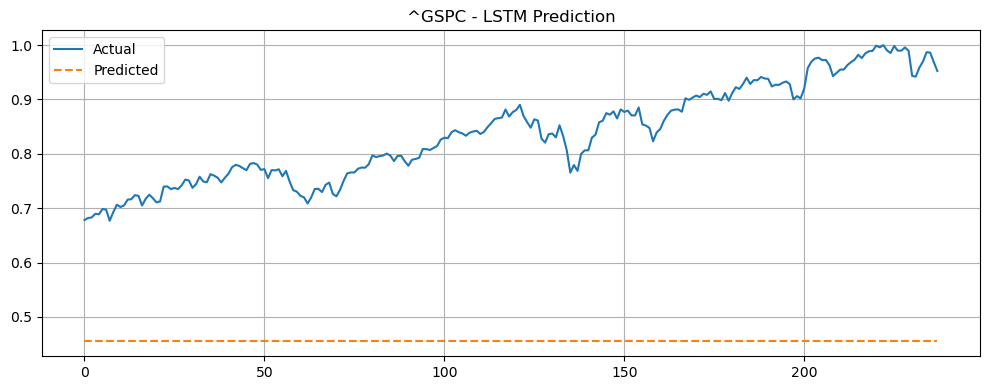

In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def create_lstm_dataset(data, sequence_length=50):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i, 3])  # 'Close' index
    return np.array(X), np.array(y)

# feature columns for LSTM
lstm_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_20', 'RSI']
sequence_length = 50

for ticker in tickers:
    print(f"\n📈 LSTM for {ticker}")
    try:
        df = preprocessed_data[ticker].copy()
        data = df[lstm_features].values

        # MinMax normalization (already implemented)
        X, y = create_lstm_dataset(data, sequence_length)

        # reshape to [samples, time steps, features]
        X_train, X_test = X[:int(0.8 * len(X))], X[int(0.8 * len(X)):]
        y_train, y_test = y[:int(0.8 * len(y))], y[int(0.8 * len(y)):]

        # define models
        model = Sequential([
            LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
            Dropout(0.2),
            LSTM(32),
            Dropout(0.2),
            Dense(1)
        ])

        model.compile(optimizer='adam', loss='mse')
        history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=0)

        y_pred = model.predict(X_test).flatten()

        # evaluate performance
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"✅ LSTM - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

        # visualization
        plt.figure(figsize=(10, 4))
        plt.plot(y_test, label='Actual')
        plt.plot(y_pred, label='Predicted', linestyle='--')
        plt.title(f"{ticker} - LSTM Prediction")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error in LSTM for {ticker}: {e}")